<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#experiment-1---Baseline" data-toc-modified-id="experiment-1---Baseline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>experiment 1 - Baseline</a></span></li><li><span><a href="#experiment-2---augmentation" data-toc-modified-id="experiment-2---augmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>experiment 2 - augmentation</a></span><ul class="toc-item"><li><span><a href="#experiment-2.1---augmentation-more-epochs" data-toc-modified-id="experiment-2.1---augmentation-more-epochs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>experiment 2.1 - augmentation more epochs</a></span></li></ul></li><li><span><a href="#experiment-3---Gradual-Unfreeze" data-toc-modified-id="experiment-3---Gradual-Unfreeze-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>experiment 3 - Gradual Unfreeze</a></span><ul class="toc-item"><li><span><a href="#experiment-3---more-epochs" data-toc-modified-id="experiment-3---more-epochs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>experiment 3 - more epochs</a></span></li></ul></li><li><span><a href="#experiment-4---combination" data-toc-modified-id="experiment-4---combination-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>experiment 4 - combination</a></span><ul class="toc-item"><li><span><a href="#experiment-4.1---combination-more-epochs" data-toc-modified-id="experiment-4.1---combination-more-epochs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>experiment 4.1 - combination more epochs</a></span></li></ul></li></ul></div>

In [129]:
import torch
import numpy as np

def metrics(conf_matrix, beta=1):
    TP = torch.diag(conf_matrix)
    TN = torch.sum(conf_matrix) - (torch.sum(conf_matrix, axis=0) + torch.sum(conf_matrix, axis=1) - TP)
    FP = torch.sum(conf_matrix, axis=0) - TP
    FN = torch.sum(conf_matrix, axis=1) - TP
        # Calculate Micro-Averaged F1 Score
    micro_precision = torch.sum(TP) / (torch.sum(TP) + torch.sum(FP))
    micro_recall = torch.sum(TP) /( torch.sum(TP) + torch.sum(FN))
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calculate accuracy
    correct_predictions = conf_matrix.diag().sum().item()
    total_predictions = conf_matrix.sum().item()
    accuracy = correct_predictions / total_predictions

    print(f"Accuracy = {accuracy:.2f}")
    

    # Calculate F1 score for each class
    f1_scores = []
    precision_scores = []
    recall_scores = []
    for class_idx in range(conf_matrix.size(0)):
        # Get true positives (TP), false positives (FP), and false negatives (FN)
        TP = conf_matrix[class_idx, class_idx]
        FP = conf_matrix[:, class_idx].sum() - TP
        FN = conf_matrix[class_idx, :].sum() - TP

        # Calculate precision, recall, and F1 score
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Calculate Balanced Accuracy
    balanced_accuracy = np.mean(recall_scores)

    # Print recall scores for each class and Balanced Accuracy
#     print("Recall Scores for Each Class:")
#     print(recall_scores)
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n{'-'*16}")

    

    macro_f1 = np.mean(f1_scores)#2 * (np.mean(precision_scores) * np.mean(recall_scores)) / (np.mean(precision_scores) + np.mean(recall_scores))

    # Calculate Sample-Weighted F1 Score
    weights = torch.sum(conf_matrix, dim=1).float() / torch.sum(conf_matrix).float()
    weighted_f1 = torch.sum(torch.tensor(f1_scores) * weights)


    print(f"Macro Precision Score: {np.mean(precision_scores):.2f}")
    print(f"Macro Recall Score:, {np.mean(recall_scores):.2f}")
#     macro_f1 = 2 * (np.mean(precision_scores) * np.mean(recall_scores)) / (np.mean(precision_scores) + np.mean(recall_scores))
    print(f"Macro-Averaged F1 Score:, {macro_f1:.2f}\n{'-'*16}")
    
   
    print(f"Sample-Weighted F1 Score:, {weighted_f1.item():.2f}\n{'-'*16}")
#     # Calculate F-beta Score~
#     f_beta = (1 + beta**2) * np.mean(precision_scores) * np.mean(recall_scores) / (beta**2 * np.mean(precision_scores) + np.mean(recall_scores))
#     print(f"F{5}-Score: {f_beta:.5f}")

In [1]:
import torch
import numpy as np

def metrics(conf_matrix, beta=1, epsilon=1e-7):  # You can adjust the value of epsilon as needed
    TP = torch.diag(conf_matrix)
    TN = torch.sum(conf_matrix) - (torch.sum(conf_matrix, axis=0) + torch.sum(conf_matrix, axis=1) - TP)
    FP = torch.sum(conf_matrix, axis=0) - TP
    FN = torch.sum(conf_matrix, axis=1) - TP

    # Calculate Micro-Averaged F1 Score
    micro_precision = TP / (TP + FP + epsilon)
    micro_recall = TP / (TP + FN + epsilon)
    

    # Calculate accuracy
    correct_predictions = conf_matrix.diag().sum().item()
    total_predictions = conf_matrix.sum().item()
    accuracy = correct_predictions / total_predictions

    print(f"Accuracy = {accuracy:.2f}")
    
    # Calculate F1 score for each class
    f1_scores = []
    precision_scores = []
    recall_scores = []
    for class_idx in range(conf_matrix.size(0)):
        # Get true positives (TP), false positives (FP), and false negatives (FN)
        TP = conf_matrix[class_idx, class_idx]
        FP = conf_matrix[:, class_idx].sum() - TP
        FN = conf_matrix[class_idx, :].sum() - TP

        # Calculate precision, recall, and F1 score with epsilon
        precision = TP / (TP + FP + epsilon)
        recall = TP / (TP + FN + epsilon)
        f1 = 2 * (precision * recall) / (precision + recall + epsilon)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate Balanced Accuracy
    balanced_accuracy = np.mean(recall_scores)

    print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n{'-'*16}")

    macro_f1 = np.mean(f1_scores)
    
    Macro_Precision = np.mean(precision_scores)
    Macro_recall= np.mean(recall_scores)
    f1_score = 2 * (Macro_Precision * Macro_recall) / (Macro_Precision + Macro_recall + epsilon)
    # Calculate Sample-Weighted F1 Score
    weights = torch.sum(conf_matrix, dim=1).float() / torch.sum(conf_matrix).float()
    weighted_f1 = torch.sum(torch.tensor(f1_scores) * weights)

    print(f"Macro Precision Score: {Macro_Precision:.2f}")
    print(f"Macro Recall Score: {Macro_recall:.2f}\n{'-'*16}")
#     print(f"Macro-Averaged F1 Score: {macro_f1:.2f}\n{'-'*16}")
    print(f"F1 Score: {f1_score:.2f}\n{'-'*16}")
    print(f"Sample-Weighted F1 Score: {weighted_f1.item():.2f}\n{'-'*16}")


## experiment 1 - Baseline

In [2]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[30,  3,  1,  0,  0,  0,  0,  0,  0],
        [ 0, 63,  7,  1,  0,  0,  0,  0,  2],
        [ 0, 25, 62,  2,  0,  0,  0,  0,  2],
        [ 0,  4,  8, 22,  2,  1,  0,  0,  1],
        [ 0,  1,  0,  9, 15,  2,  1,  0,  7],
        [ 0,  0,  0,  1,  6, 26,  3,  1,  4],
        [ 0,  0,  0,  2,  1,  2,  4,  7, 13],
        [ 0,  0,  0,  5,  0,  0,  0, 19, 21],
        [ 0,  0,  0,  1,  0,  0,  0,  0, 12]])


metrics(conf_matrix, beta=0.1)

Accuracy = 0.63
Balanced Accuracy: 0.62
----------------
Macro Precision Score: 0.65
Macro Recall Score: 0.62
----------------
F1 Score: 0.63
----------------
Sample-Weighted F1 Score: 0.64
----------------


In [3]:
conf_matrix =torch.tensor([[31,  2,  1,  0,  0,  0,  0,  0,  0],
        [ 0, 70,  3,  0,  0,  0,  0,  0,  1],
        [ 0, 45, 42,  1,  0,  0,  0,  0,  2],
        [ 0,  8, 11, 13,  4,  2,  0,  0,  1],
        [ 0,  0,  0,  5, 18,  2,  0,  0,  7],
        [ 0,  0,  0,  2,  7, 26,  3,  1,  4],
        [ 1,  0,  0,  1,  1,  3,  3,  6,  8],
        [ 0,  1,  0,  1,  0,  1,  2, 21, 23],
        [ 0,  0,  0,  1,  0,  0,  0,  2, 12]])
metrics(conf_matrix, beta=0.1)

Accuracy = 0.59
Balanced Accuracy: 0.58
----------------
Macro Precision Score: 0.61
Macro Recall Score: 0.58
----------------
F1 Score: 0.59
----------------
Sample-Weighted F1 Score: 0.59
----------------


## experiment 2 - augmentation

In [4]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 63, 10,  0,  0,  0,  0,  0,  0],
        [ 0, 12, 75,  4,  0,  0,  0,  0,  0],
        [ 0,  1,  4, 28,  4,  1,  0,  0,  0],
        [ 0,  0,  0,  4, 31,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  7, 27,  7,  0,  0],
        [ 0,  0,  0,  1, 11,  0,  5,  8,  4],
        [ 0,  0,  0,  0,  6,  0,  1, 30,  8],
        [ 0,  0,  0,  0,  0,  0,  0,  2, 11]])


metrics(conf_matrix, beta=0.1)

Accuracy = 0.76
Balanced Accuracy: 0.74
----------------
Macro Precision Score: 0.73
Macro Recall Score: 0.74
----------------
F1 Score: 0.73
----------------
Sample-Weighted F1 Score: 0.76
----------------


### experiment 2.1 - augmentation more epochs

In [5]:
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 68,  6,  0,  0,  0,  0,  0,  0],
        [ 0, 19, 70,  1,  0,  0,  0,  0,  0],
        [ 0,  1,  3, 31,  4,  0,  0,  0,  0],
        [ 0,  0,  0,  3, 29,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 10, 32,  1,  0,  0],
        [ 0,  0,  0,  0, 10,  0,  0, 12,  1],
        [ 0,  0,  0,  0,  2,  0,  0, 47,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  7,  7]])
metrics(conf_matrix, beta=0.1)

Accuracy = 0.80
Balanced Accuracy: 0.73
----------------
Macro Precision Score: 0.74
Macro Recall Score: 0.73
----------------
F1 Score: 0.73
----------------
Sample-Weighted F1 Score: 0.78
----------------


## experiment 3 - Gradual Unfreeze

In [6]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 68,  3,  0,  0,  0,  0,  0,  2],
        [ 0, 31, 48,  1,  0,  0,  1,  0, 10],
        [ 0,  4,  3, 17,  9,  0,  0,  0,  5],
        [ 0,  0,  0,  5, 25,  2,  1,  1,  1],
        [ 0,  0,  0,  1,  5, 29,  4,  0,  2],
        [ 0,  1,  0,  2,  1,  0,  9, 11,  5],
        [ 0,  0,  0,  0,  0,  0,  1, 41,  3],
        [ 0,  0,  0,  0,  0,  0,  0,  5,  8]])


metrics(conf_matrix, beta=0.1)  # You can specify the beta value here

Accuracy = 0.70
Balanced Accuracy: 0.68
----------------
Macro Precision Score: 0.69
Macro Recall Score: 0.68
----------------
F1 Score: 0.69
----------------
Sample-Weighted F1 Score: 0.70
----------------


### experiment 3 - more epochs

In [7]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[32,  2,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 70,  2,  0,  0,  0,  0,  0,  2],
        [ 0, 32, 49,  1,  0,  0,  1,  0,  7],
        [ 0,  8,  4, 15,  7,  0,  0,  0,  5],
        [ 0,  0,  0,  2, 23,  1,  3,  1,  2],
        [ 0,  1,  0,  1,  6, 30,  4,  0,  1],
        [ 0,  1,  0,  2,  1,  0,  7,  6,  6],
        [ 0,  0,  0,  0,  0,  0,  0, 41,  8],
        [ 0,  0,  0,  0,  0,  0,  0,  6,  9]])


metrics(conf_matrix, beta=0.1)

Accuracy = 0.69
Balanced Accuracy: 0.66
----------------
Macro Precision Score: 0.70
Macro Recall Score: 0.66
----------------
F1 Score: 0.68
----------------
Sample-Weighted F1 Score: 0.69
----------------


## experiment 4 - combination

In [8]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 72,  2,  0,  0,  0,  0,  0,  0],
        [ 0,  3, 85,  2,  0,  0,  0,  0,  0],
        [ 0,  0,  5, 32,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  1, 30,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  1, 39,  3,  0,  0],
        [ 0,  0,  0,  0, 10,  0,  8,  3,  2],
        [ 0,  0,  0,  0,  2,  0,  0, 42,  5],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 15]])


metrics(conf_matrix, beta=0.1)

Accuracy = 0.89
Balanced Accuracy: 0.87
----------------
Macro Precision Score: 0.86
Macro Recall Score: 0.87
----------------
F1 Score: 0.86
----------------
Sample-Weighted F1 Score: 0.89
----------------


### experiment 4.1 - combination more epochs

In [9]:
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 73,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  2, 86,  2,  0,  0,  0,  0,  0],
        [ 0,  0,  5, 34,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1, 31,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  2, 38,  3,  0,  0],
        [ 0,  0,  0,  1,  7,  1,  9,  3,  2],
        [ 0,  0,  2,  0,  0,  0,  0, 44,  3],
        [ 0,  0,  0,  0,  0,  0,  0,  1, 14]])
metrics(conf_matrix, beta=0.1)

Accuracy = 0.91
Balanced Accuracy: 0.88
----------------
Macro Precision Score: 0.88
Macro Recall Score: 0.88
----------------
F1 Score: 0.88
----------------
Sample-Weighted F1 Score: 0.91
----------------


In [105]:
import torch
import numpy as np

def metrics(conf_matrix, beta=1):
    TP = torch.diag(conf_matrix)
    TN = torch.sum(conf_matrix) - (torch.sum(conf_matrix, axis=0) + torch.sum(conf_matrix, axis=1) - TP)
    FP = torch.sum(conf_matrix, axis=0) - TP
    FN = torch.sum(conf_matrix, axis=1) - TP

    # Calculate Micro-Averaged F1 Score
    micro_precision = torch.sum(TP) / (torch.sum(TP) + torch.sum(FP))
    micro_recall = torch.sum(TP) / (torch.sum(TP) + torch.sum(FN))
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calculate accuracy
    correct_predictions = conf_matrix.diag().sum().item()
    total_predictions = conf_matrix.sum().item()
    accuracy = correct_predictions / total_predictions

    # Calculate F1 score for each class
    f1_scores = []
    precision_scores = []
    recall_scores = []
    for class_idx in range(conf_matrix.size(0)):
        # Get true positives (TP), false positives (FP), and false negatives (FN)
        TP = conf_matrix[class_idx, class_idx]
        FP = conf_matrix[:, class_idx].sum() - TP
        FN = conf_matrix[class_idx, :].sum() - TP

        # Calculate precision, recall, and F1 score
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate Balanced Accuracy
    balanced_accuracy = np.mean(recall_scores)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"Macro Precision: {np.mean(precision_scores):.2f}")
    print(f"Macro Recall: {np.mean(recall_scores):.2f}")

    macro_f1 = np.mean(f1_scores)
    print(f"Macro F1 Score: {macro_f1:.2f}")

    print(f"Micro Precision: {micro_precision:.2f}")
    print(f"Micro Recall: {micro_recall:.2f}")
    print(f"Micro F1 Score: {micro_f1:.2f}")

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 68,  3,  0,  0,  0,  0,  0,  2],
        [ 0, 31, 48,  1,  0,  0,  1,  0, 10],
        [ 0,  4,  3, 17,  9,  0,  0,  0,  5],
        [ 0,  0,  0,  5, 25,  2,  1,  1,  1],
        [ 0,  0,  0,  1,  5, 29,  4,  0,  2],
        [ 0,  1,  0,  2,  1,  0,  9, 11,  5],
        [ 0,  0,  0,  0,  0,  0,  1, 41,  3],
        [ 0,  0,  0,  0,  0,  0,  0,  5,  8]])

metrics(conf_matrix, beta=0.1)  # You can specify the beta value here



Accuracy: 0.70
Balanced Accuracy: 0.68
Macro Precision: 0.69
Macro Recall: 0.68
Macro F1 Score: 0.66
Micro Precision: 0.70
Micro Recall: 0.70
Micro F1 Score: 0.70


In [44]:
import torch
import numpy as np

def metrics(conf_matrix, beta=1):
    # Calculate accuracy
    correct_predictions = conf_matrix.diag().sum().item()
    total_predictions = conf_matrix.sum().item()
    accuracy = correct_predictions / total_predictions

    print(f"Accuracy = {accuracy * 100:.2f}%")
    
    # Initialize variables to aggregate TP, FP, FN for all classes
    TP = 0
    FP = 0
    FN = 0

    # Calculate F1 score for each class
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for class_idx in range(conf_matrix.size(0)):
        # Get true positives (TP), false positives (FP), and false negatives (FN)
        TP += conf_matrix[class_idx, class_idx].item()
        FP += (conf_matrix[:, class_idx].sum() - TP)
        FN += (conf_matrix[class_idx, :].sum() - TP)

        # Calculate precision, recall, and F1 score for the current class
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
    # Calculate Micro-Averaged Precision, Recall, and F1 Score
    micro_precision = TP / (TP + FP)
    micro_recall = TP / (TP + FN)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calculate Balanced Accuracy
    balanced_accuracy = np.mean(recall_scores)

    # Print recall scores for each class, Balanced Accuracy, and Micro metrics
    print("Balanced Accuracy:", balanced_accuracy)
    print(f"Micro-Averaged Precision Score: {micro_precision}")
    print(f"Micro-Averaged Recall Score: {micro_recall}")
    print(f"Micro-Averaged F1 Score: {micro_f1}")

    # Calculate Macro-Averaged F1 Score
    macro_f1 = np.mean(f1_scores)
    
    # Calculate Sample-Weighted F1 Score
    weights = torch.sum(conf_matrix, dim=1).float() / torch.sum(conf_matrix).float()
    weighted_f1 = torch.sum(torch.tensor(f1_scores) * weights)

    # Calculate F-beta Score
    f_beta = (1 + beta**2) * np.mean(precision_scores) * np.mean(recall_scores) / (beta**2 * np.mean(precision_scores) + np.mean(recall_scores))

    print(f"Macro Precision Score: {np.mean(precision_scores)}")
    print(f"Macro Recall Score: {np.mean(recall_scores)}")
    print(f"Macro-Averaged F1 Score: {macro_f1}")
    print(f"Sample-Weighted F1 Score: {weighted_f1.item()}")
    print(f"F{beta}-Score: {f_beta}")

# Rest of your code remains the same


In [45]:

# Replace the confusion matrix with your own
conf_matrix = torch.tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 68,  3,  0,  0,  0,  0,  0,  2],
        [ 0, 31, 48,  1,  0,  0,  1,  0, 10],
        [ 0,  4,  3, 17,  9,  0,  0,  0,  5],
        [ 0,  0,  0,  5, 25,  2,  1,  1,  1],
        [ 0,  0,  0,  1,  5, 29,  4,  0,  2],
        [ 0,  1,  0,  2,  1,  0,  9, 11,  5],
        [ 0,  0,  0,  0,  0,  0,  1, 41,  3],
        [ 0,  0,  0,  0,  0,  0,  0,  5,  8]])


metrics(conf_matrix, beta=0.1)  # You can specify the beta value here

Accuracy = 69.92%
Balanced Accuracy: -0.15000027
Micro-Averaged Precision Score: -0.28822311758995056
Micro-Averaged Recall Score: -0.28822311758995056
Micro-Averaged F1 Score: -0.28822311758995056
Macro Precision Score: -0.05220694839954376
Macro Recall Score: -0.15000027418136597
Macro-Averaged F1 Score: -0.09811916947364807
Sample-Weighted F1 Score: 0.3685404062271118
F0.1-Score: -0.052546133333061795


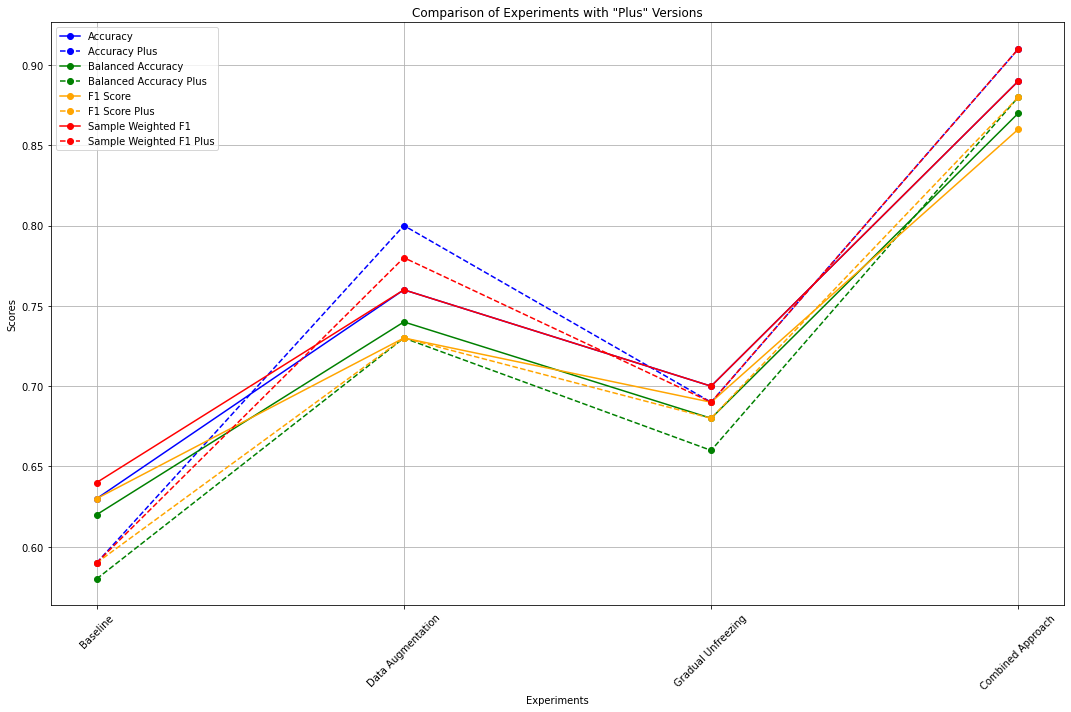

In [15]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data Augmentation", "Gradual Unfreezing", "Combined Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
precision = [0.65, 0.73, 0.69, 0.86]
precision_plus = [0.61, 0.74, 0.7, 0.88]
recall = [0.58, 0.74, 0.68, 0.87]
recall_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize = (15,10))

# Plot lines for experiments
ax.plot(experiments, accuracy, marker='o', linestyle='-', color='blue', label='Accuracy')
ax.plot(experiments, accuracy_plus, marker='o', linestyle='--', color='blue', label='Accuracy Plus')

ax.plot(experiments, balanced_accuracy, marker='o', linestyle='-', color='green', label='Balanced Accuracy')
ax.plot(experiments, balanced_accuracy_plus, marker='o', linestyle='--', color='green', label='Balanced Accuracy Plus')

# ax.plot(experiments, precision, marker='o', linestyle='-', color='red', label='Precision')
# ax.plot(experiments, precision_plus, marker='o', linestyle='--', color='red', label='Precision Plus')

# ax.plot(experiments, recall, marker='o', linestyle='-', color='purple', label='Recall')
# ax.plot(experiments, recall_plus, marker='o', linestyle='--', color='purple', label='Recall Plus')

ax.plot(experiments, f1_score, marker='o', linestyle='-', color='orange', label='F1 Score')
ax.plot(experiments, f1_score_plus, marker='o', linestyle='--', color='orange', label='F1 Score Plus')

ax.plot(experiments, sample_weighted_f1, marker='o', linestyle='-', color='red', label='Sample Weighted F1')
ax.plot(experiments, sample_weighted_f1_plus, marker='o', linestyle='--', color='red', label='Sample Weighted F1 Plus')

# Set title and labels
ax.set_title('Comparison of Experiments with "Plus" Versions')
ax.set_xlabel('Experiments')
ax.set_ylabel('Scores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


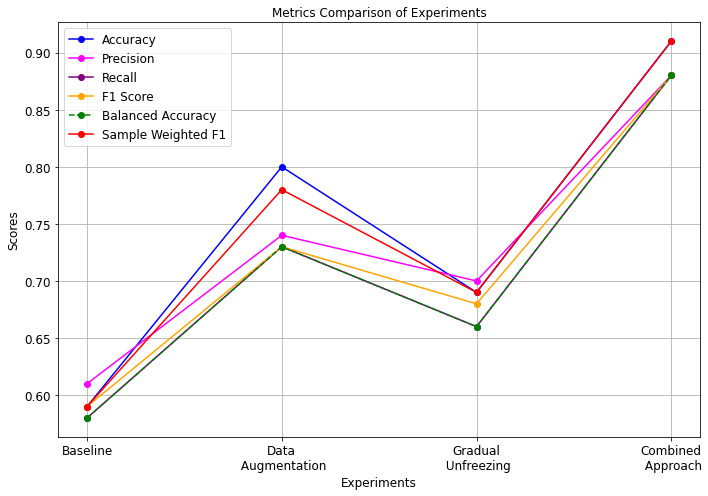

In [67]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data\n Augmentation", "Gradual\n Unfreezing", "Combined\n Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
precision = [0.65, 0.73, 0.69, 0.86]
precision_plus = [0.61, 0.74, 0.7, 0.88]
recall = [0.58, 0.74, 0.68, 0.87]
recall_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize = (10,7))

# Plot lines for experiments
# ax.plot(experiments, accuracy, marker='o', linestyle='-', color='blue', label='Accuracy')
ax.plot(experiments, accuracy_plus, marker='o', linestyle='-', color='blue', label='Accuracy')



# ax.plot(experiments, precision, marker='o', linestyle='-', color='red', label='Precision')
ax.plot(experiments, precision_plus, marker='o', linestyle='-', color='magenta', label='Precision')

# # ax.plot(experiments, recall, marker='o', linestyle='-', color='purple', label='Recall')
ax.plot(experiments, recall_plus, marker='o', linestyle='-', color='purple', label='Recall')

# ax.plot(experiments, f1_score, marker='o', linestyle='-', color='orange', label='F1 Score')
ax.plot(experiments, f1_score_plus, marker='o', linestyle='-', color='orange', label='F1 Score')
# ax.plot(experiments, balanced_accuracy, marker='o', linestyle='-', color='green', label='Balanced Accuracy')
ax.plot(experiments, balanced_accuracy_plus, marker='o', linestyle='--', color='green', label='Balanced Accuracy')
# ax.plot(experiments, sample_weighted_f1, marker='o', linestyle='-', color='magenta', label='Sample Weighted F1')
ax.plot(experiments, sample_weighted_f1_plus, marker='o', linestyle='-', color='red', label='Sample Weighted F1')

# Set title and labels
ax.set_title('Metrics Comparison of Experiments',fontsize=12)
ax.set_xlabel('Experiments',fontsize=12)
ax.set_ylabel('Scores',fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12)

# Add a legend
ax.legend(fontsize=12)
# Set y-tick font size
plt.yticks(fontsize=12)
# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


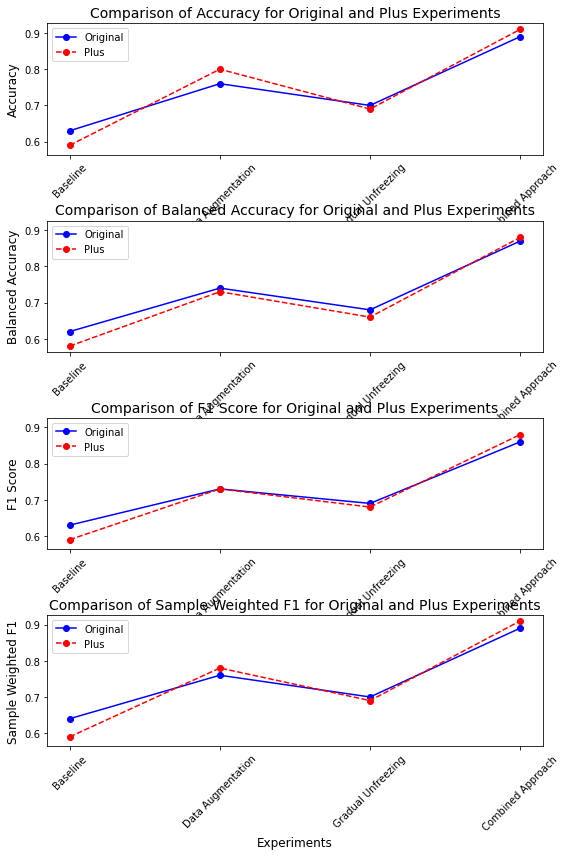

In [43]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data Augmentation", "Gradual Unfreezing", "Combined Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Sample Weighted F1']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 12),sharey=True)

for i, metric in enumerate(metrics):
    # Plot lines for original experiments
    axes[i].plot(experiments, accuracy if metric == 'Accuracy' else
                 balanced_accuracy if metric == 'Balanced Accuracy' else
                 f1_score if metric == 'F1 Score' else sample_weighted_f1,
                 marker='o', linestyle='-', color='blue', label='Original')

    # Plot lines for "Plus" experiments
    axes[i].plot(experiments, accuracy_plus if metric == 'Accuracy' else
                 balanced_accuracy_plus if metric == 'Balanced Accuracy' else
                 f1_score_plus if metric == 'F1 Score' else sample_weighted_f1_plus,
                 marker='o', linestyle='--', color='red', label='Plus')

    # Set title and labels for each subplot
    axes[i].set_title(f'Comparison of {metric} for Original and Plus Experiments', fontsize=14)
    axes[i].set_xlabel('Experiments', fontsize=12)
    axes[i].set_ylabel(f'{metric}', fontsize=12)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', labelrotation=45)

    # Add a legend
    axes[i].legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.show()



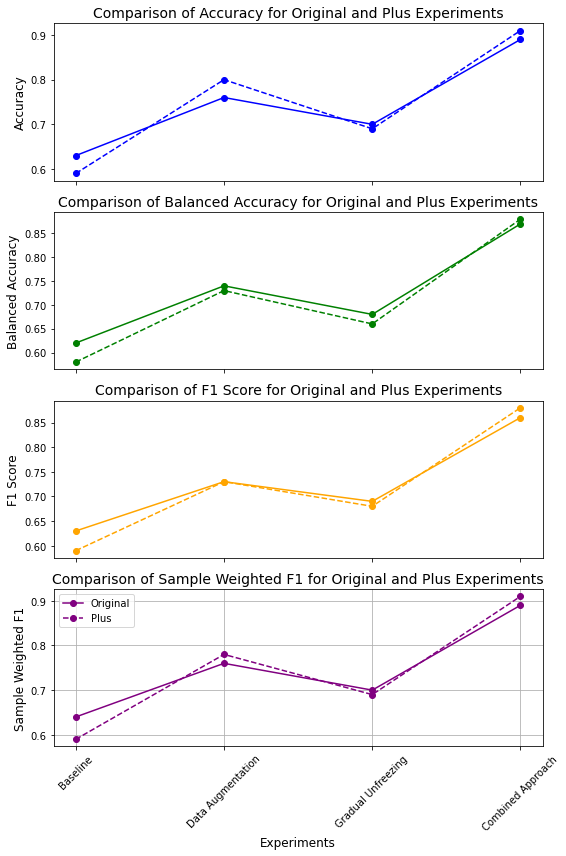

In [49]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data Augmentation", "Gradual Unfreezing", "Combined Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Sample Weighted F1']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 12), sharex=True)

# Set different colors for each plot
colors = ['blue', 'green', 'orange', 'purple']

for i, metric in enumerate(metrics):

    # Plot lines for original experiments
    axes[i].plot(experiments, accuracy if metric == 'Accuracy' else
                 balanced_accuracy if metric == 'Balanced Accuracy' else
                 f1_score if metric == 'F1 Score' else sample_weighted_f1,
                 marker='o', linestyle='-', color=colors[i], label='Original')

    # Plot lines for "Plus" experiments
    axes[i].plot(experiments, accuracy_plus if metric == 'Accuracy' else
                 balanced_accuracy_plus if metric == 'Balanced Accuracy' else
                 f1_score_plus if metric == 'F1 Score' else sample_weighted_f1_plus,
                 marker='o', linestyle='--', color=colors[i], label='Plus')

    # Set title and labels for each subplot
    axes[i].set_title(f'Comparison of {metric} for Original and Plus Experiments', fontsize=14)
    axes[i].set_ylabel(f'{metric}', fontsize=12)

    # Add a legend
    if i == len(metrics) - 1:
        # Display x ticks only on the bottom plot
        axes[i].set_xlabel('Experiments', fontsize=12)
        
        axes[i].set_xticks(range(len(experiments)))
        axes[i].set_xticklabels(experiments)
        axes[i].tick_params(axis='x', labelrotation=45)
        axes[i].legend(loc='upper left')  # Display legend on the top-left corner

    # Hide x ticks for other plots
    else:
        plt.grid()
        axes[i].set_xticks([])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)  # Adjust vertical spacing between subplots
plt.show()


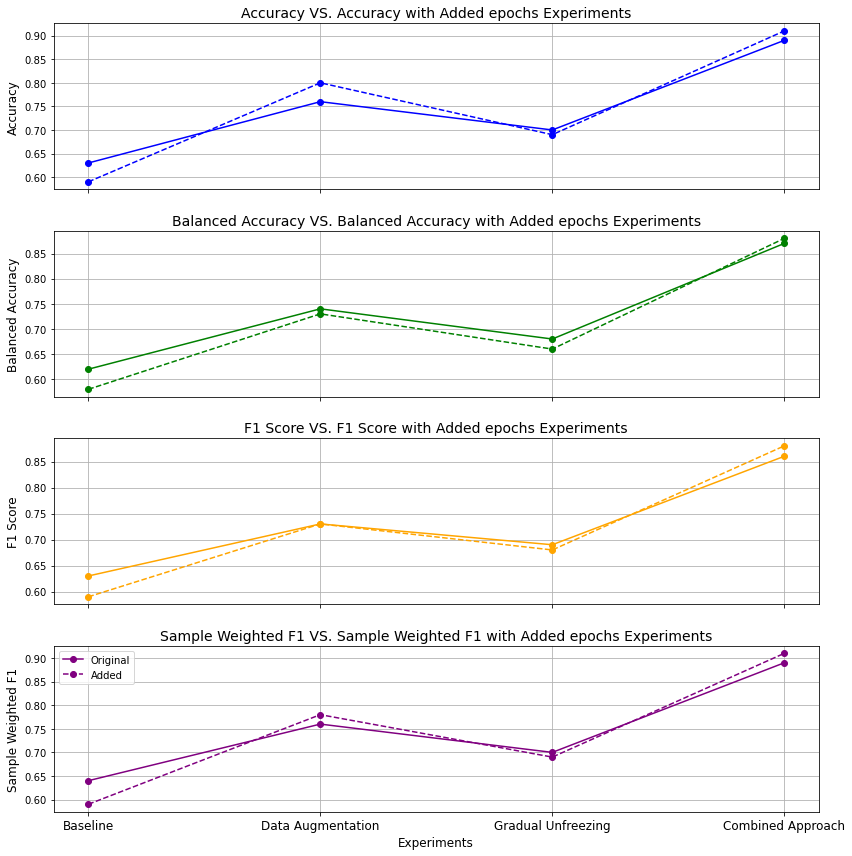

In [62]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data Augmentation", "Gradual Unfreezing", "Combined Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Sample Weighted F1']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 12), sharex=True)

# Set different colors for each plot
colors = ['blue', 'green', 'orange', 'purple']

for i, metric in enumerate(metrics):
    # Plot lines for original experiments
    axes[i].plot(experiments, accuracy if metric == 'Accuracy' else
                 balanced_accuracy if metric == 'Balanced Accuracy' else
                 f1_score if metric == 'F1 Score' else sample_weighted_f1,
                 marker='o', linestyle='-', color=colors[i], label='Original')

    # Plot lines for "Plus" experiments
    axes[i].plot(experiments, accuracy_plus if metric == 'Accuracy' else
                 balanced_accuracy_plus if metric == 'Balanced Accuracy' else
                 f1_score_plus if metric == 'F1 Score' else sample_weighted_f1_plus,
                 marker='o', linestyle='--', color=colors[i], label='Added')

    # Set title and labels for each subplot
    axes[i].set_title(f'{metric} VS. {metric} with Added epochs Experiments', fontsize=14)
    axes[i].set_ylabel(f'{metric}', fontsize=12)
    
    # Add a grid
    axes[i].grid(True)

    # Add a legend
    if i == len(metrics) - 1:
        # Display x ticks only on the bottom plot
        axes[i].set_xlabel('Experiments', fontsize=12)
        axes[i].set_xticks(range(len(experiments)))
        axes[i].set_xticklabels(experiments)
        axes[i].tick_params(axis='x')
        axes[i].legend(loc='upper left')  # Display legend on the top-left corner

    # Hide x ticks for other plots
    else:
        axes[i].set_xticks([])
plt.xticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)  # Adjust vertical spacing between subplots
plt.show()


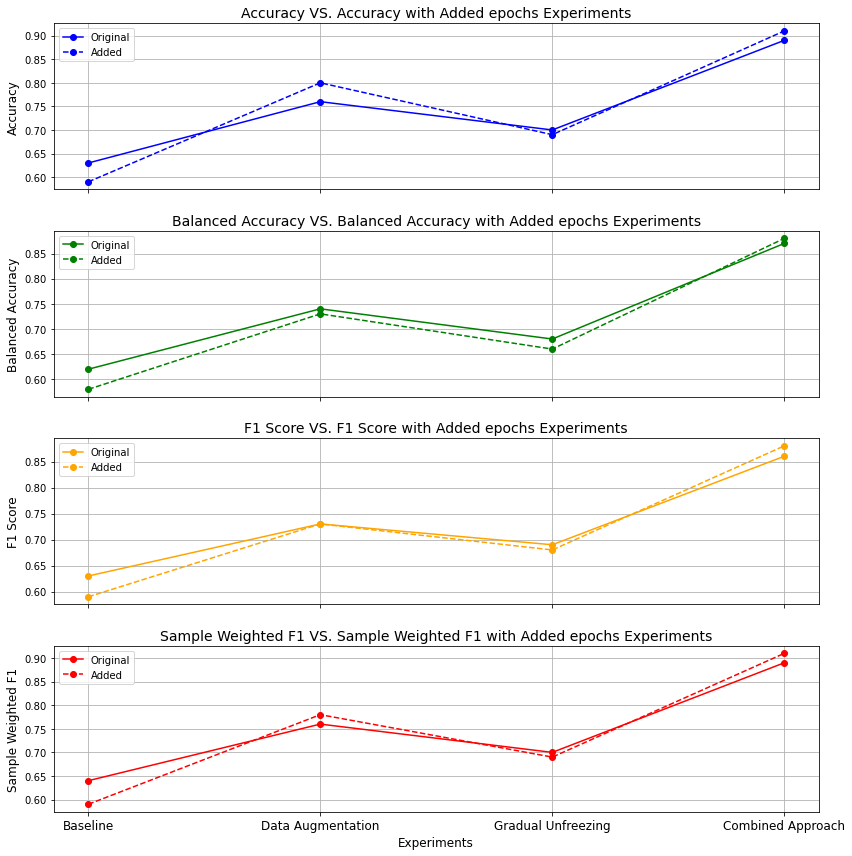

In [64]:
import matplotlib.pyplot as plt

# Define data
experiments = ["Baseline", "Data Augmentation", "Gradual Unfreezing", "Combined Approach"]
accuracy = [0.63, 0.76, 0.7, 0.89]
accuracy_plus = [0.59, 0.8, 0.69, 0.91]
balanced_accuracy = [0.62, 0.74, 0.68, 0.87]
balanced_accuracy_plus = [0.58, 0.73, 0.66, 0.88]
f1_score = [0.63, 0.73, 0.69, 0.86]
f1_score_plus = [0.59, 0.73, 0.68, 0.88]
sample_weighted_f1 = [0.64, 0.76, 0.7, 0.89]
sample_weighted_f1_plus = [0.59, 0.78, 0.69, 0.91]

metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Sample Weighted F1']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 12), sharex=True)

# Set different colors for each plot
colors = ['blue', 'green', 'orange', 'red']

for i, metric in enumerate(metrics):
    # Plot lines for original experiments
    axes[i].plot(experiments, accuracy if metric == 'Accuracy' else
                 balanced_accuracy if metric == 'Balanced Accuracy' else
                 f1_score if metric == 'F1 Score' else sample_weighted_f1,
                 marker='o', linestyle='-', color=colors[i], label='Original')

    # Plot lines for "Plus" experiments
    axes[i].plot(experiments, accuracy_plus if metric == 'Accuracy' else
                 balanced_accuracy_plus if metric == 'Balanced Accuracy' else
                 f1_score_plus if metric == 'F1 Score' else sample_weighted_f1_plus,
                 marker='o', linestyle='--', color=colors[i], label='Added')

    # Set title and labels for each subplot
    axes[i].set_title(f'{metric} VS. {metric} with Added epochs Experiments', fontsize=14)
    axes[i].set_ylabel(f'{metric}', fontsize=12)
    
    # Add a grid
    axes[i].grid(True)

    # Add a legend to each subplot
    axes[i].legend(loc='upper left')

    # Set x ticks only on the bottom plot
    if i == len(metrics) - 1:
        axes[i].set_xlabel('Experiments', fontsize=12)
        axes[i].set_xticks(range(len(experiments)))
        axes[i].set_xticklabels(experiments)
        axes[i].tick_params(axis='x')
    else:
        axes[i].set_xticks([])

plt.xticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)  # Adjust vertical spacing between subplots
plt.show()
